In [166]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

In [167]:
import os
import cv2
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split

In [98]:
train_data_dir = 'C:/Users/Sri/Desktop/Projects/paleo/Data/SampData'
validation_data_dir = 'C:/Users/Sri/Desktop/Projects/paleo/Data/Val'
nb_train_samples =90
nb_validation_samples = 16
epochs = 50
batch_size = 16

In [79]:
img_width, img_height = 224, 224

In [80]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [333]:
imgs=[]
labels=[]
shape = (224,224)

In [334]:
direc = os.fsencode("C:/Users/Sri/Desktop/Projects/paleo/Data/SampData")

In [335]:
for folders in os.listdir(direc):
    folder=bytes("/"+str(folders)[2:-1],"utf-8")
    for files in os.listdir(direc+folder):
        file=bytes("/"+str(files)[2:-1],"utf-8")
        labels.append(str(folders)[2:-1])
        addr=str(direc+folder+file)[2:-1]
        img=cv2.imread(addr)
        img=cv2.resize(img,shape)
        imgs.append(img)

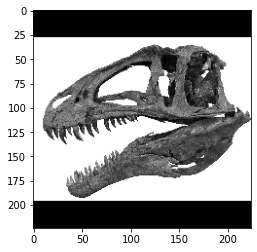

In [348]:
plt.imshow(imgset[0])

In [337]:
classification={
    'Acrocanthosaurus':[1,0,0,0,0,0,0,0],
    'Albertosaurus':[0,1,0,0,0,0,0,0],
    'Baryonyx':[0,0,1,0,0,0,0,0],
    'Carnotarus':[0,0,0,1,0,0,0,0],
    'Ceratosaurus':[0,0,0,0,1,0,0,0],
    'Concavenator':[0,0,0,0,0,1,0,0],
    'Dilophosaurus':[0,0,0,0,0,0,1,0],
    'Tyrannosaurus':[0,0,0,0,0,0,0,1]
}

In [387]:
classes={
    0:"Acrocanthosaurus",
    1:"Albertosaurus",
    2:"Baryonyx",
    3:"Carnotarus",
    4:"Ceratosaurus",
    5:"Concavenator",
    6:"Dilophosaurus",
    7:"Tyrannosaurus"
}

In [339]:
for i in range(len(labels)):
    labels[i]=classification[labels[i]]

In [340]:
labels

[[1, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0],
 

In [349]:
imgset=np.array(imgs)
labels=np.array(labels)

In [350]:
x_train,x_val,y_train,y_val = train_test_split(imgset,labels,random_state=1)

In [353]:
model= Sequential()
model.add(Conv2D(kernel_size=(3,3), filters=32, activation='tanh', input_shape=(224,224,3,)))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))

model.add(Flatten())

model.add(Dense(20,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(8,activation = 'softmax'))
    
model.compile(loss='categorical_crossentropy',metrics=['acc'],optimizer='adam')

In [354]:
history = model.fit(x_train,y_train,epochs=50,batch_size=50,validation_data=(x_val,y_val))

Epoch 1/50
2/2 [==============================] - 7s 2s/step - loss: 2.6626 - acc: 0.1159 - val_loss: 8.3724 - val_acc: 0.2083
Epoch 2/50
2/2 [==============================] - 5s 2s/step - loss: 12.3706 - acc: 0.0580 - val_loss: 2.6007 - val_acc: 0.2500
Epoch 3/50
2/2 [==============================] - 5s 2s/step - loss: 2.8361 - acc: 0.1014 - val_loss: 3.1603 - val_acc: 0.2500
Epoch 4/50
2/2 [==============================] - 5s 2s/step - loss: 3.7426 - acc: 0.1159 - val_loss: 2.9058 - val_acc: 0.0417
Epoch 5/50
2/2 [==============================] - 5s 2s/step - loss: 2.7803 - acc: 0.1304 - val_loss: 2.7856 - val_acc: 0.0417
Epoch 6/50
2/2 [==============================] - 5s 2s/step - loss: 2.4561 - acc: 0.1594 - val_loss: 2.2108 - val_acc: 0.1667
Epoch 7/50
2/2 [==============================] - 5s 2s/step - loss: 2.2787 - acc: 0.1159 - val_loss: 2.1747 - val_acc: 0.0833
Epoch 8/50
2/2 [==============================] - 5s 2s/step - loss: 2.1364 - acc: 0.0435 - val_loss: 2.3525 -

In [355]:
model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_78 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 conv2d_79 (Conv2D)          (None, 220, 220, 30)      8670      
                                                                 
 max_pooling2d_52 (MaxPooli  (None, 110, 110, 30)      0         
 ng2D)                                                           
                                                                 
 conv2d_80 (Conv2D)          (None, 108, 108, 30)      8130      
                                                                 
 max_pooling2d_53 (MaxPooli  (None, 54, 54, 30)        0         
 ng2D)                                                           
                                                                 
 conv2d_81 (Conv2D)          (None, 52, 52, 30)      

In [356]:
import matplotlib.pyplot as plt

In [384]:
history

TypeError: 'History' object is not subscriptable

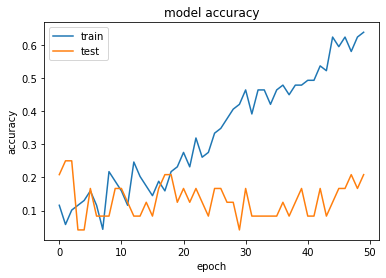

In [437]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [23]:
from keras.models import load_model
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
#model = load_model('model_saved.h5')
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16

In [438]:
testimage = load_img('C:/Users/Sri/Desktop/14.png', target_size=(224, 224))

In [439]:
test = np.array(testimage)
test = img.reshape(1,224,224,3)

In [440]:
label = model.predict(test)

1/1 [==============================] - 0s 39ms/step


In [441]:
def result(label):
    for i in range(8):
        maxi=max(label[0])
        if label[0][i]==maxi:
            print("The skull belongs to a {} with a confidence of {}%".format(classes[i],"%.3f" % maxi))

In [442]:
result(label)

The skull belongs to a Dilophosaurus with a confidence of 0.750%


In [443]:
label

array([[1.8331695e-02, 1.5840779e-01, 1.3347687e-05, 3.6944017e-05,
        7.1150638e-02, 5.0220529e-05, 7.5031179e-01, 1.6976253e-03]],
      dtype=float32)